#  CNN
## MNIST 사례


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

import os
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
seed =  2020

np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28,28,1).astype('float32')/255
#X_train = X_train.reshape(-1, 28,28,1).astype('float32')/255
X_test = X_test.reshape(X_test.shape[0], 28,28,1).astype('float32')/255
#X_test = X_test.reshape(-1, 28,28,1).astype('float32')/255
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)


In [4]:
model = Sequential([
    Conv2D(32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'),
    Conv2D(64,(4,4),activation='relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.25),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(256, activation = 'relu'),
    Dropout(0.5),
    Dense(10, activation = 'softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                495680    
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [5]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [6]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [7]:
modelpath = MODEL_DIR + "과제-1-cnn-{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',
                               verbose = 1 , save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience = 10)

In [8]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30,
                    batch_size=200, #epochs=5, verbose=2, 
                    callbacks=[early_stopping_callback, checkpointer])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 56s 938us/step - loss: 0.2745 - accuracy: 0.9135 - val_loss: 0.0528 - val_accuracy: 0.9833

Epoch 00001: val_loss improved from inf to 0.05276, saving model to ./model/과제-1-cnn-01-0.0528.hdf5
Epoch 2/30
60000/60000 [==============================] - 57s 955us/step - loss: 0.0627 - accuracy: 0.9820 - val_loss: 0.0347 - val_accuracy: 0.9885

Epoch 00002: val_loss improved from 0.05276 to 0.03468, saving model to ./model/과제-1-cnn-02-0.0347.hdf5
Epoch 3/30
60000/60000 [==============================] - 56s 941us/step - loss: 0.0417 - accuracy: 0.9873 - val_loss: 0.0358 - val_accuracy: 0.9892

Epoch 00003: val_loss did not improve from 0.03468
Epoch 4/30
60000/60000 [==============================] - 56s 936us/step - loss: 0.0329 - accuracy: 0.9899 - val_loss: 0.0299 - val_accuracy: 0.9899

Epoch 00004: val_loss improved from 0.03468 to 0.02990, saving model to ./model/과제-1-cnn-04-0.0

In [9]:
from tensorflow.keras.models import load_model

model = load_model('model/과제-1-cnn-07-0.0281.hdf5')

In [10]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test, verbose=0)[1]))


 Test Accuracy: 0.9918


In [11]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

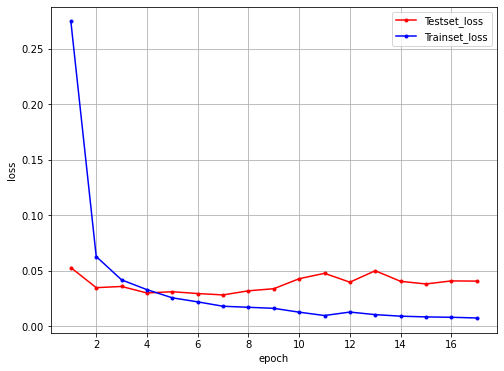

In [12]:
x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize=(8,6))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

#  DNN
## MNIST 사례

In [222]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [223]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

import os
import matplotlib.pyplot as plt
%matplotlib inline

In [224]:
seed =  2020

np.random.seed(seed)
tf.random.set_seed(seed)

In [225]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [226]:
X_train.shape

(60000, 28, 28)

In [227]:
len(Y_train)

60000

In [228]:
X_test.shape

(10000, 28, 28)

In [229]:
len(Y_test)

10000

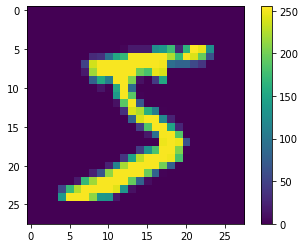

In [230]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [231]:
X_train = X_train / 255.0

X_test  = X_test / 255.0

In [232]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [233]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [234]:
model.fit(X_train, Y_train, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2245 - accuracy: 0.9330
Epoch 2/20
60000/60000 [==============================] - 2s 33us/sample - loss: 0.0980 - accuracy: 0.9702
Epoch 3/20
60000/60000 [==============================] - 2s 33us/sample - loss: 0.0716 - accuracy: 0.9782
Epoch 4/20
60000/60000 [==============================] - 2s 33us/sample - loss: 0.0548 - accuracy: 0.9824
Epoch 5/20
60000/60000 [==============================] - 2s 33us/sample - loss: 0.0445 - accuracy: 0.9862
Epoch 6/20
60000/60000 [==============================] - 2s 33us/sample - loss: 0.0382 - accuracy: 0.9877
Epoch 7/20
60000/60000 [==============================] - 2s 33us/sample - loss: 0.0324 - accuracy: 0.9899
Epoch 8/20
60000/60000 [==============================] - 2s 33us/sample - loss: 0.0271 - accuracy: 0.9914
Epoch 9/20
60000/60000 [==============================] - 2s 33us/sample - loss: 0.0263 - accuracy: 0.9915
Epoch 10/20
60

In [235]:
test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)

print('\n테스트 정확도:', test_acc)

10000/10000 - 0s - loss: 0.1009 - accuracy: 0.9819

테스트 정확도: 0.9819
